In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [37]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    dt=1/(x[1]-x[0])
   # assert np.sqrt(2)<dt/2, "Frecuencia de la señal mayor al limite de Nysquic"
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [38]:
t_max=100
N=400
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t) ###Prueba
y=f(t)
y_2=f(t) ###Prueba

In [39]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(0.7033663091899005-0.023275396684723004j)

## PUNTO 2 c

In [40]:
f_0=1/(t[1]-t[0])
frecuencias=np.linspace(0,f_0,10*len(t))
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)

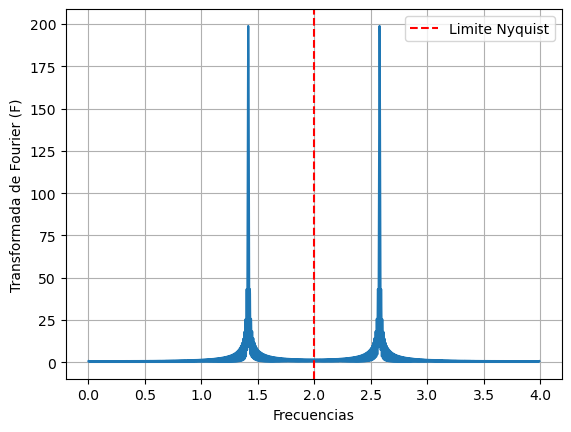

In [41]:
plt.plot(frecuencias,F)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

## PUNTO 2 D

In [42]:
##Ruido
ruido=np.random.normal(0.0,0.1,N)
y_new=ruido+y

In [43]:
F_new=norma_transformada(frecuencias,t,y_new)

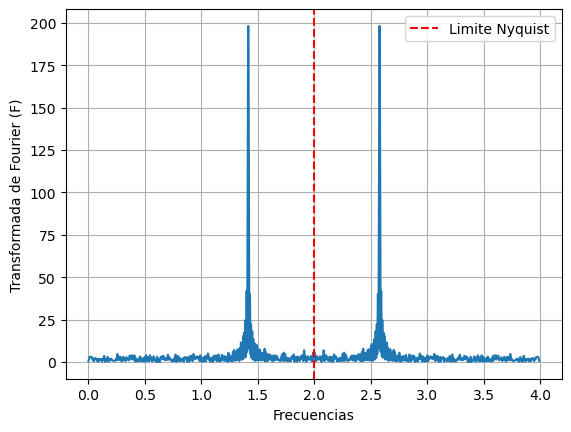

In [44]:
plt.plot(frecuencias,F_new)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

Se evidencia una leve amplificación a las frecuencias bajas y ciertas variaciones en la grafica de Fourier respecto a frecuencia

In [45]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_max=np.max(F2)
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(frecuencias[i1]-frecuencias[i2])
    return distancia[0], altura_max,indice_altura_max[0][0]

## PUNTO 3A

In [46]:
ancho,altura_maxima,posicion=pico_FWHM(F_new,frecuencias)
ancho,altura_maxima,posicion

(0.012970742685671333, 198.23541548957473, 1417)


| N   | Ancho   | x   |
|-----|---------|-----|
| 100 | 0.006   | 285 |
| 200 | 0.059   | 284 |
| 500 | 0.059   | 283 |
| 700 | 0.059   | 283 |
| 800 | 0.059   | 283 |

### Resultados $3 B$ (sin cambiar \(N = 400\))

| \(t_{\max}\) | Ancho   | x    |
|--------------|---------|------|
| 5            | 0.24    | 71   |
| 10           | 0.119   | 142  |
| 20           | 0.059   | 283  |
| 50           | 0.023   | 709  |
| 100          | 0.011   | 1417 |

## PUNTO 4

In [12]:
N=80
ts_0=np.linspace(0,10,N)
ts=ts_0+np.random.normal(0.,0.01,N)
f=15
ys=np.sin(2*np.pi*ts*f)
dt=1/(ts[1]-ts[0])
nyquist=dt*(1/2)
nyquist

3.8562979380443947

In [13]:
Transformada_Fourier(ts,ys,nyquist)

(0.9611514826808234+5.536806338229487j)

In [33]:
frecuencias=np.linspace(0,dt*30,10*N)
Fs=norma_transformada(frecuencias,ts,ys)

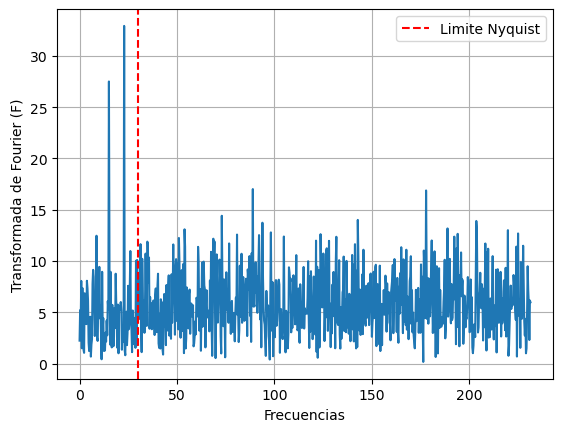

In [35]:
plt.plot(frecuencias,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(30,color="r",linestyle="--",label="Limite Nyquist")
plt.legend()
plt.grid()

No se puede recuperar la frecuencia original porque la frecuencia principal de la señal es mayor que la frecuencia de muestreo, lo que produce el efecto aliasing. Así, las frecuencias altas de la señal original se mezclan con las frecuencias bajas, causando distorsión y pérdida de información en el proceso de reconstrucción de la señal. Esto da lugar a componentes de frecuencia incorrectas. Por lo tanto, no se puede conocer con precisión la frecuencia real, y la frecuencia de muestreo no representará completamente la frecuencia real de los datos.

## PUNTO 5

In [16]:
import pandas as pd

In [28]:
data="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
datos=pd.read_csv(data,delim_whitespace=True,header=None)
datos.columns=["t","y","$\sigma_y$"]
t_data=datos["t"]
y_data=datos["y"]
ny=1/(t[1]-t[0])
frecuencias_data=np.linspace(-1,ny,100*len(y)) ##Varia dependiendo del valor de N y de donde parte 

3.99

In [29]:
F_data=norma_transformada(frecuencias_data,t_data,y_data)
ancho,altura_maxima,posicion=pico_FWHM(F_data,frecuencias_data)
frecuencia_señal=frecuencias_data[posicion]
frecuencia_señal

2.1000525013192828e-05

$\textit{La frecuencia principal de la señal es: }$

In [19]:
frecuencia_muestreo=2*frecuencia_señal
frecuencia_muestreo

2.001498746867168

$\textit{La frecuencia de muestreo es igual a:}$

In [20]:
phi=y_data*frecuencia_señal%1

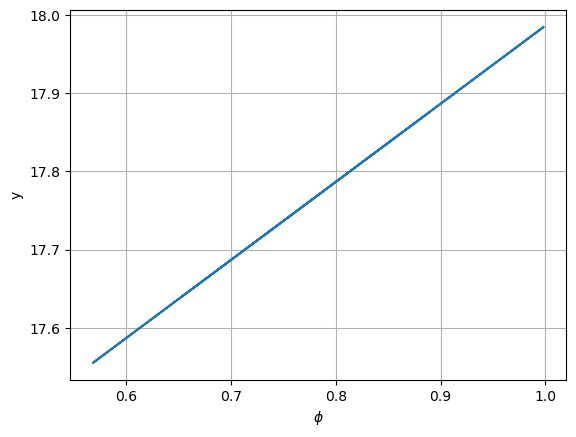

In [21]:
plt.plot(phi,y_data)
plt.xlabel("$\phi$")
plt.ylabel("y")
plt.grid()